<a href="https://colab.research.google.com/github/Yuvraj-cyborg/EDA_Titanic/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initialisation of the EDA with all libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

Use Titanic dataset from Seaborn

In [5]:
print("\nLoading Titanic Dataset...")
df = sns.load_dataset("titanic")

print("Dataset Loaded Successfully !")
print("Shape: ",df.shape)
df.head()


Loading Titanic Dataset...
Dataset Loaded Successfully !
Shape:  (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Basic Info and summary statistics


column names :

In [6]:
columns = df.columns
print("Column Names: ")
for col in columns:
    print(f"- {col}")

Column Names: 
- survived
- pclass
- sex
- age
- sibsp
- parch
- fare
- embarked
- class
- who
- adult_male
- deck
- embark_town
- alive
- alone


In [7]:
print("Dataset info :- ")
df.info()

Dataset info :- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Check number of rows and columns

In [8]:
print("\nDataset Dimensions: ")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")


Dataset Dimensions: 
Rows: 891
Columns: 15


Data types of all columns or features

In [9]:
print("\nData Types:")
print(df.dtypes)


Data Types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


Number of unique values in each column

In [10]:
print("\nUnique Values: ")
print(df.nunique())


Unique Values: 
survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64


In [11]:
print("\nvariable counts:")
print(df.count())


variable counts:
survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64


Missing values in each column

In [12]:
print("\nMissing values: ")
missing = df.isnull().sum()
print("Number of missing values in each column: ")
print(missing)


Missing values: 
Number of missing values in each column: 
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [13]:
missing_pct=df.isnull().mean().sort_values(ascending=False)
print((missing_pct[missing_pct>0]*100).round(2))

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
dtype: float64


Descriptive Statistics of categorical and numerical columns

In [14]:
print("\nNumeric summary: ")
display(df.describe(include=[np.number]).T)
print("\nCategorical summary: ")
display(df.describe(include=['object','category', 'bool']).T)


Numeric summary: 


,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



Categorical summary: 


,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
class,891,3,Third,491
who,891,3,man,537
adult_male,891,2,True,537
deck,203,7,C,59
embark_town,889,3,Southampton,644
alive,891,2,no,549
alone,891,2,True,537


#**Data Analysis**

numeric and categorical columns

In [15]:
target_column='survived'
print("\nNumeric Features:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col!=target_column]
print(numeric_cols)
print("\nCategorical Features:")
categorical_cols = df.select_dtypes(include=['object','category', 'bool']).columns.tolist()
print(categorical_cols)
print("\nTarget Column:")
print(target_column)


Numeric Features:
['pclass', 'age', 'sibsp', 'parch', 'fare']

Categorical Features:
['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Target Column:
survived


#Univariate analysis

##Numerical features(Histogram)


Univariate Analysis:


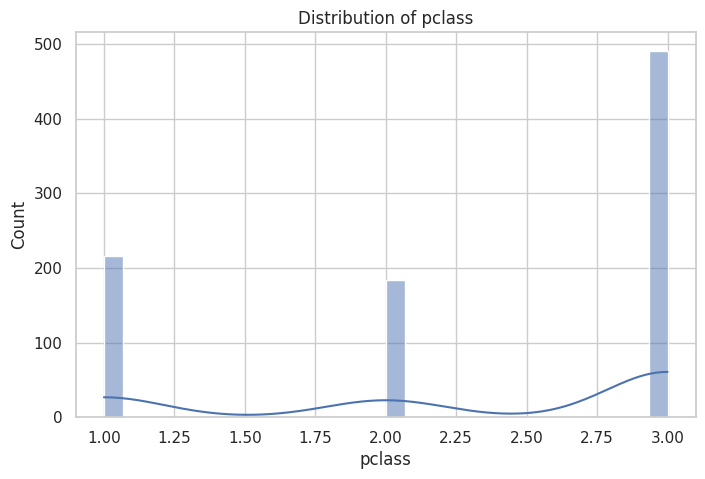

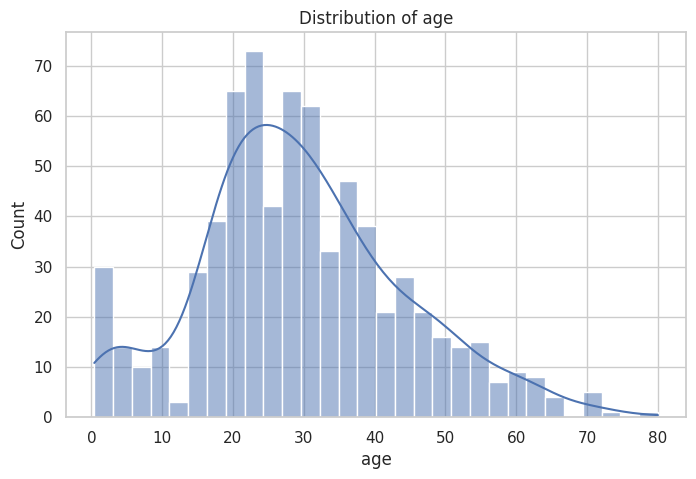

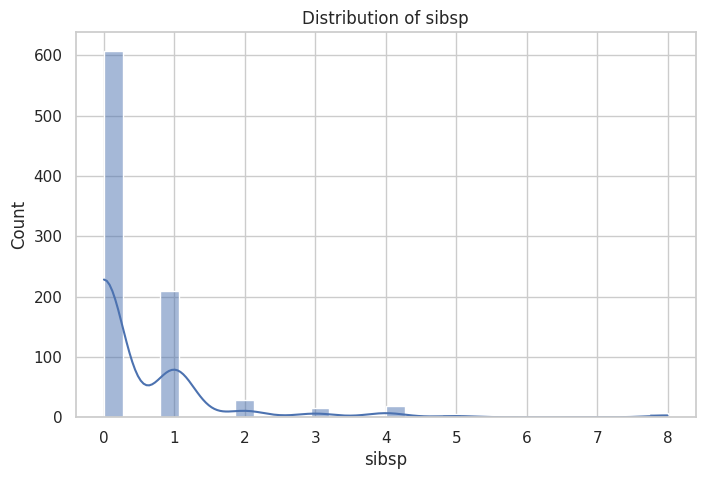

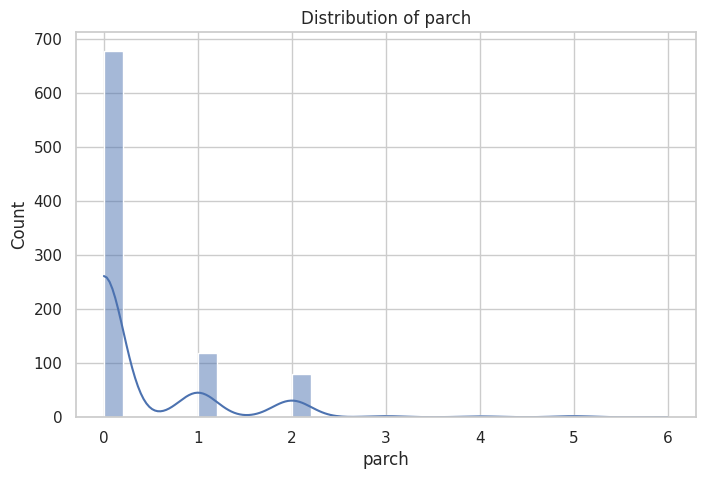

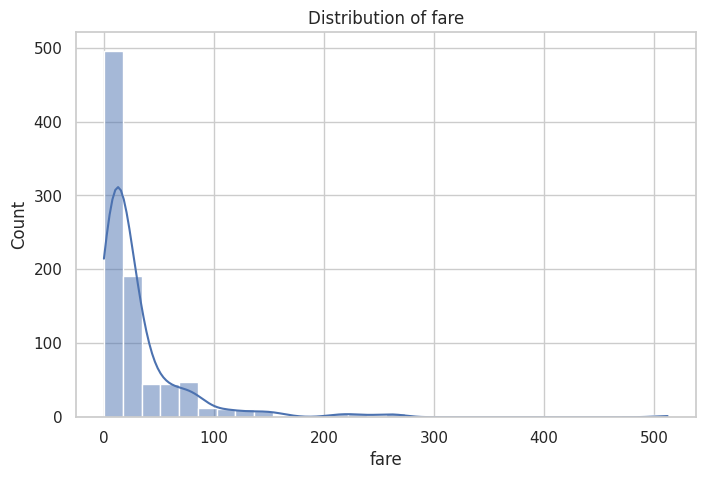

In [16]:
print("\nUnivariate Analysis:")
for col in numeric_cols:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

##Top catrgories for categorical features (value counts)


Categorical Feature count:


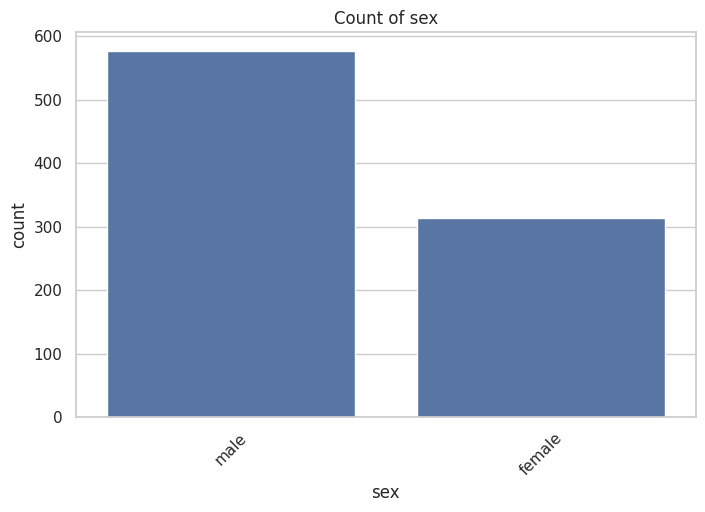

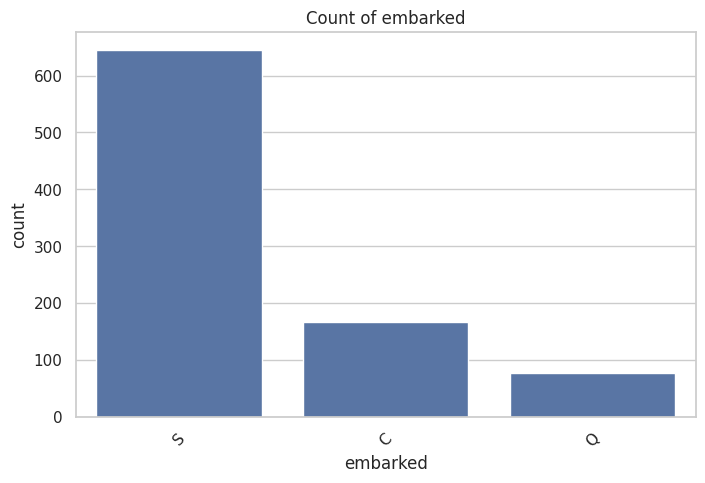

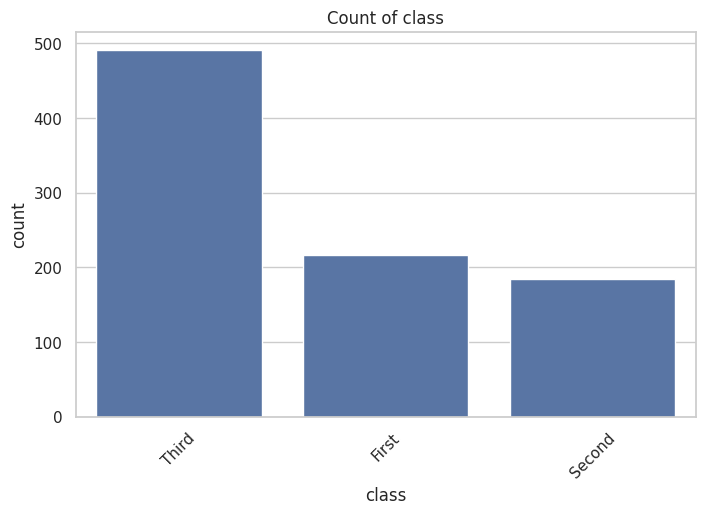

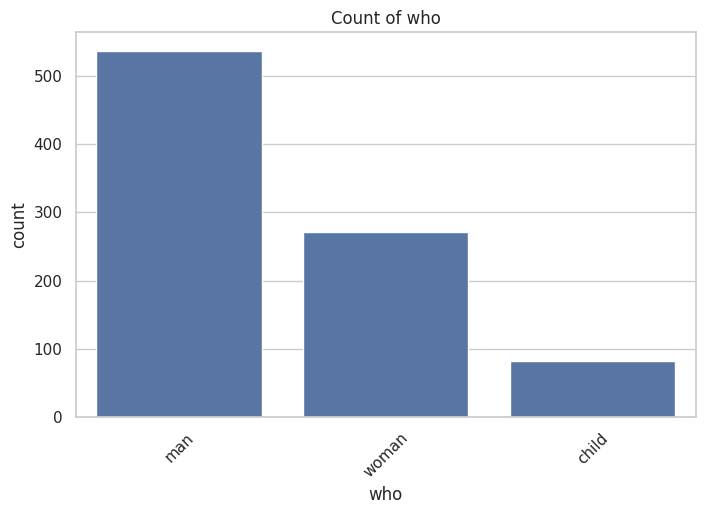

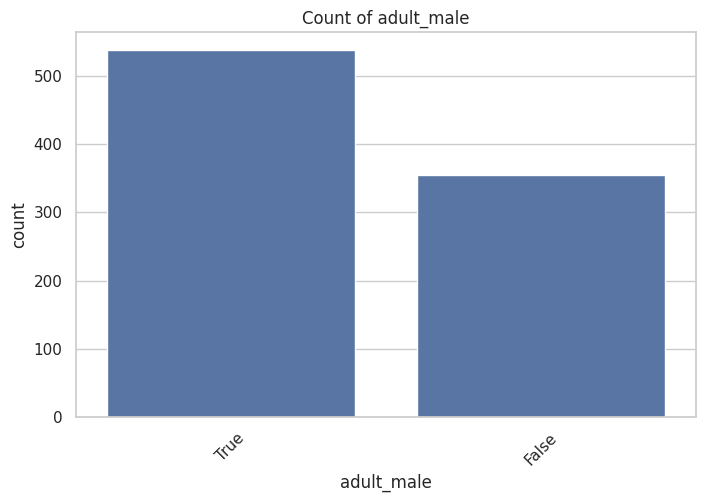

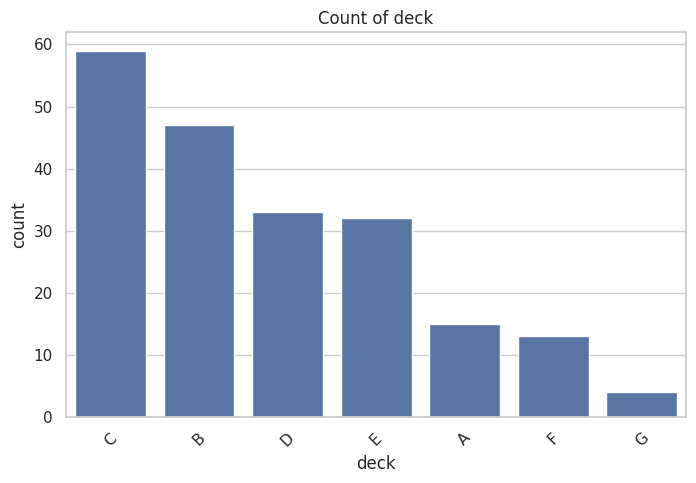

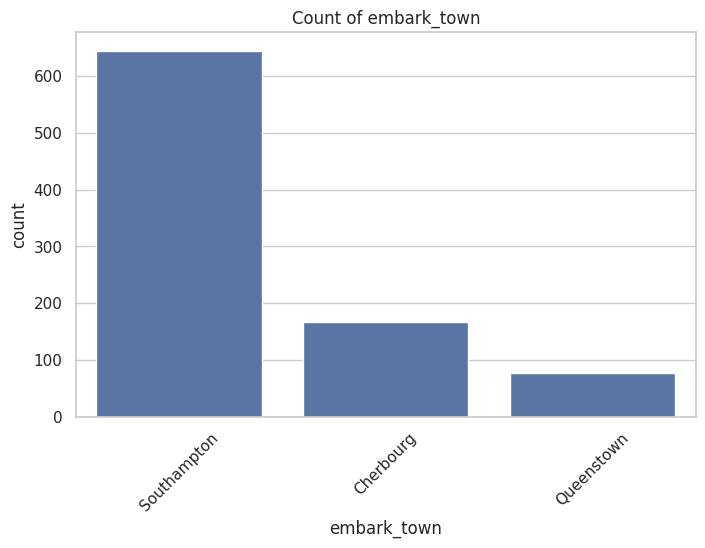

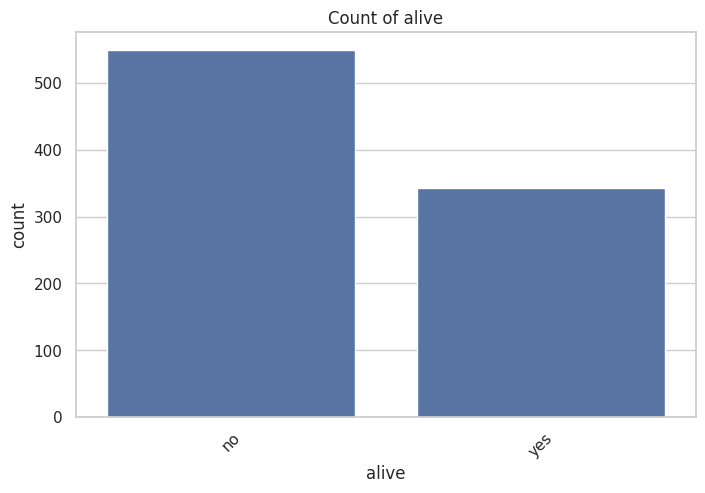

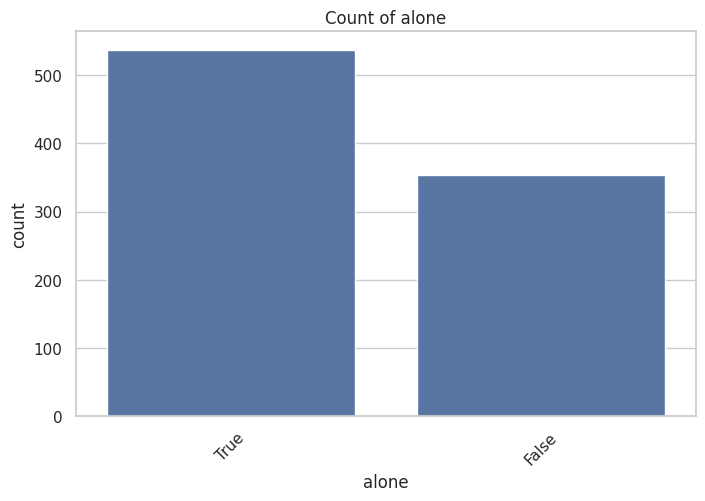

In [17]:
print("\nCategorical Feature count:")
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

#Bivariate analysis

###Features relate to the target

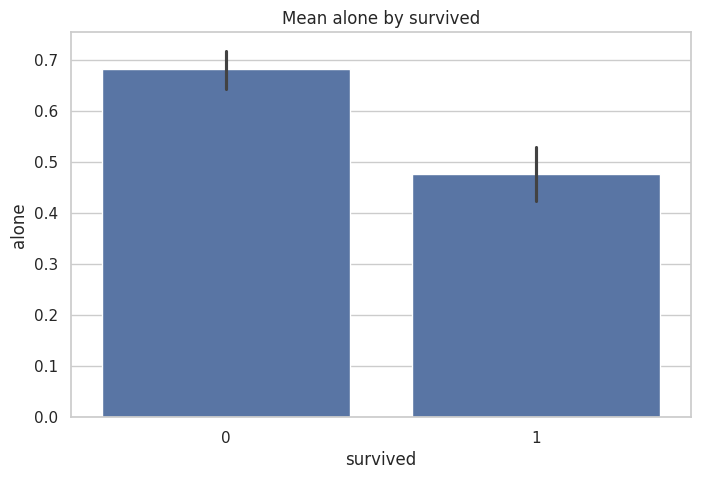

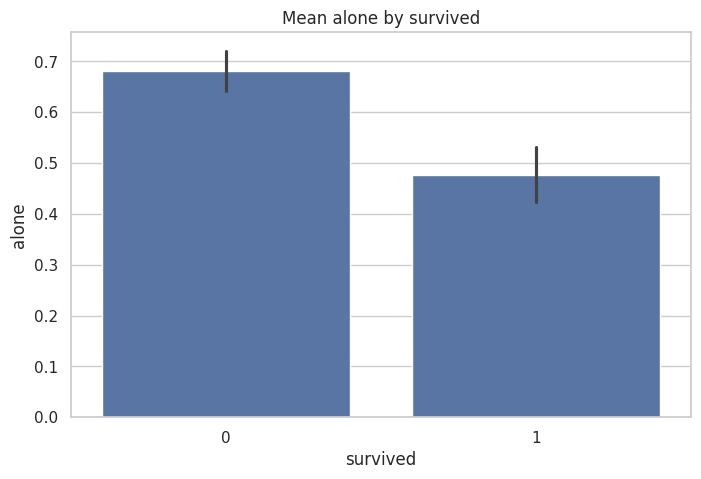

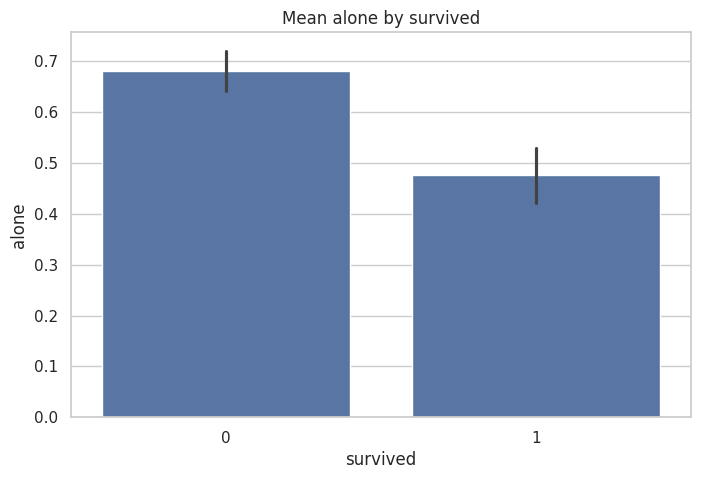

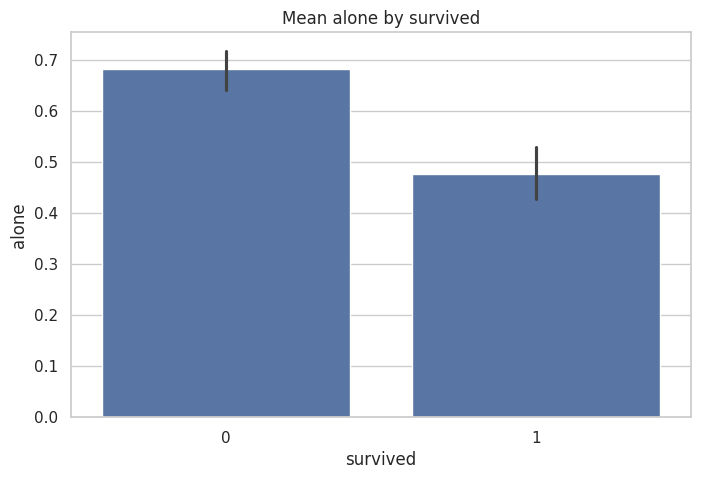

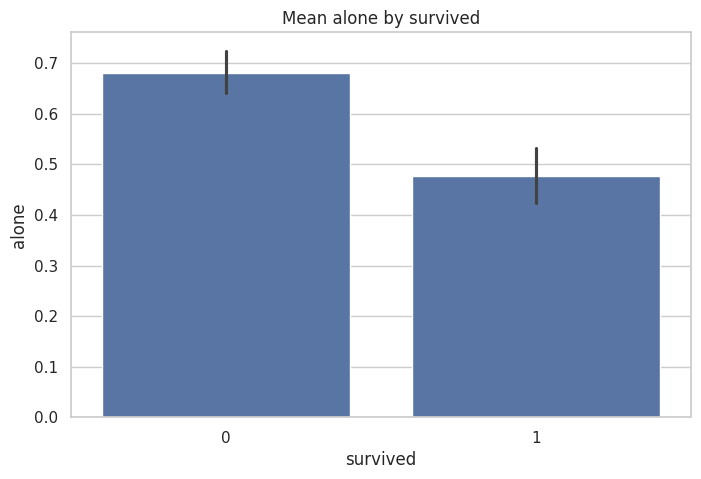

In [18]:
# Numeric vs target: barplots
for cols in numeric_cols:
    plt.figure()
    sns.barplot(data=df, x=target_column, y=col)
    plt.title(f'Mean {col} by {target_column}')
    plt.show()

# Mean parch by survived


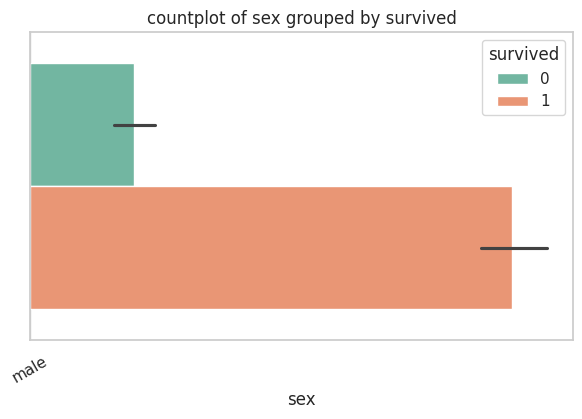

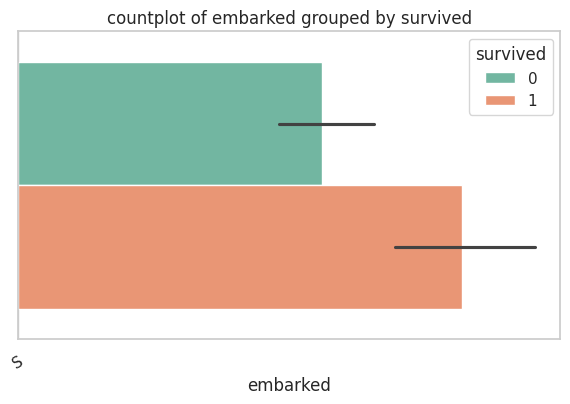

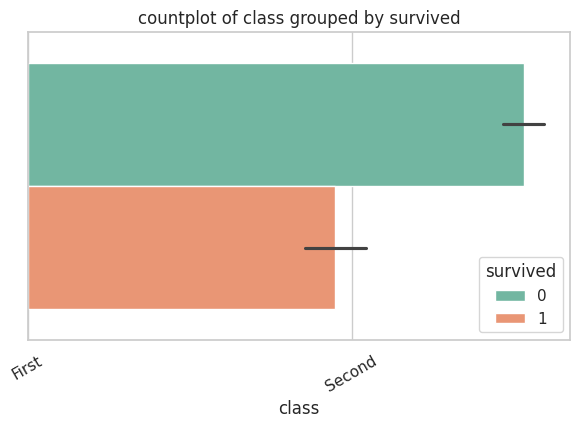

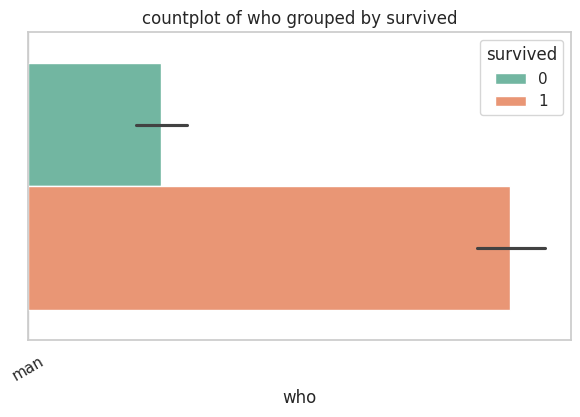

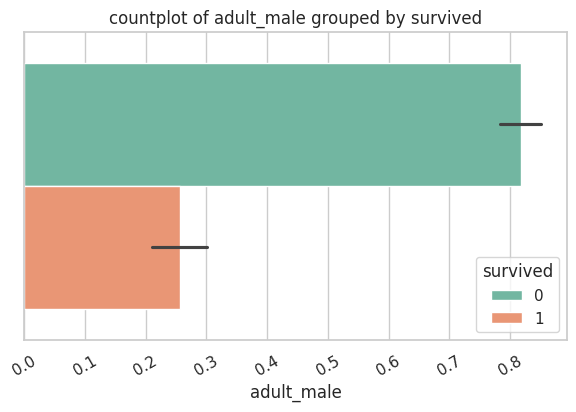

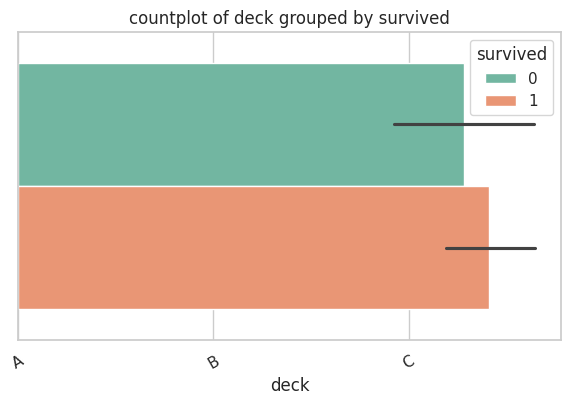

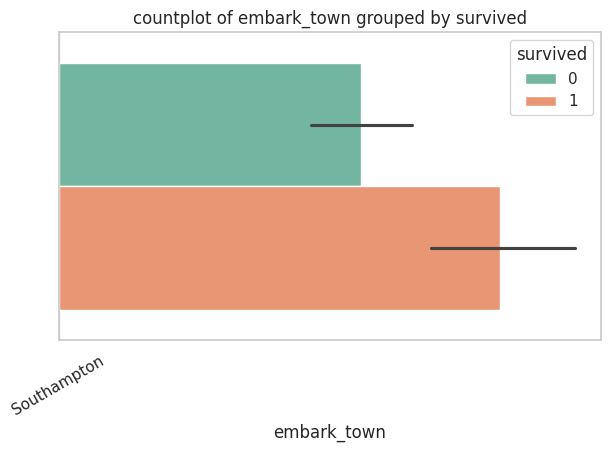

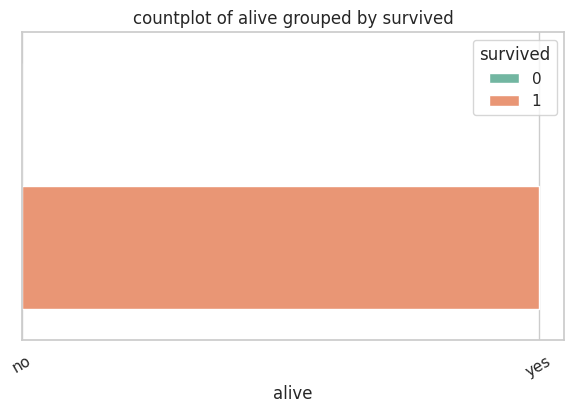

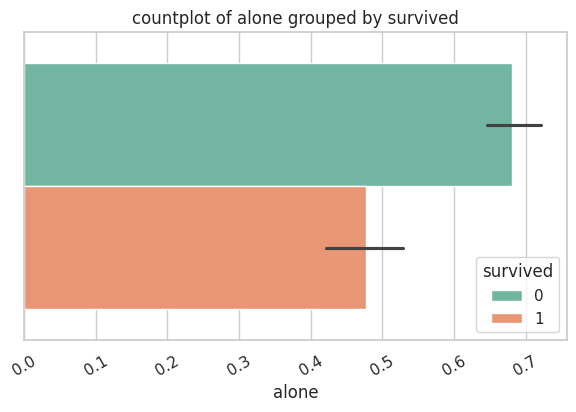

In [19]:
#categorical vs target
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.barplot(x=col,hue=target_column,data=df, palette="Set2")
    plt.title(f'countplot of {col} grouped by {target_column}')
    plt.xticks(rotation=30)
    plt.legend(title=target_column)
    plt.show()

#Handle Missing Values

##Missing values - deeper analysis

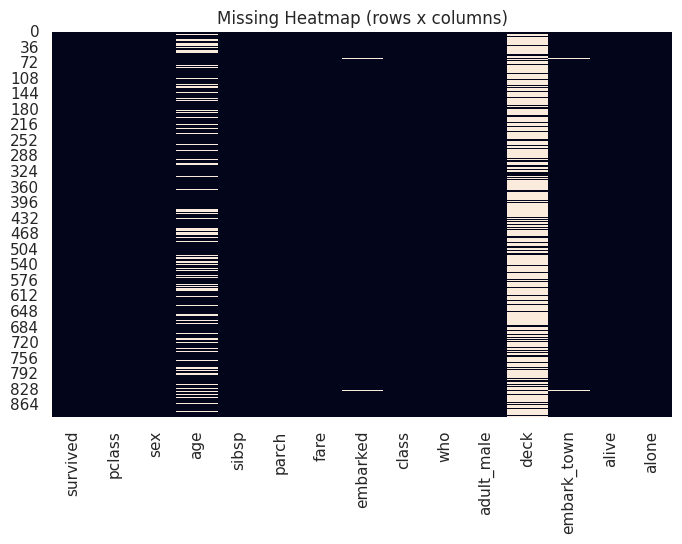

In [20]:
#Missing heatmap
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Heatmap (rows x columns)')
plt.show()

In [21]:
#Missing by column (sorted)
missing_sorted = df.isnull().sum().sort_values(ascending=False)
missing_sorted

,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


##Strategies to deal with missing values
- Drop roews with missing values.
- Drop rows with more than 50% of column values are missing.
- Drop columns with very high missingness (e.g., > 50%)
- Impute categorical with mode
- Impute numeric with median/mean or KNNImputer

In [22]:
# Drop rows with missing value (only do this if )



 Outlier Detection using Boxplots: 


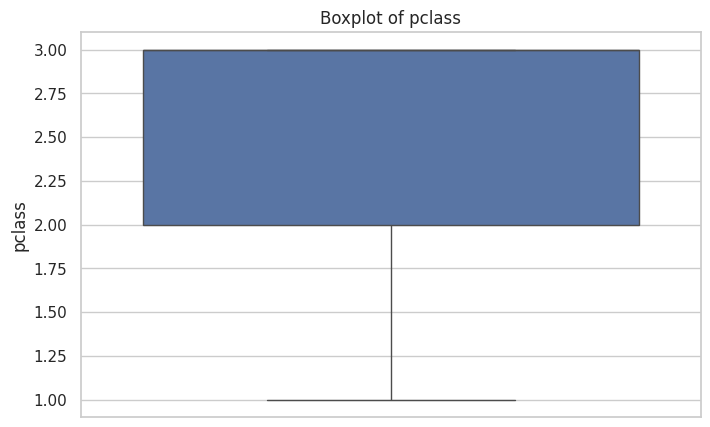

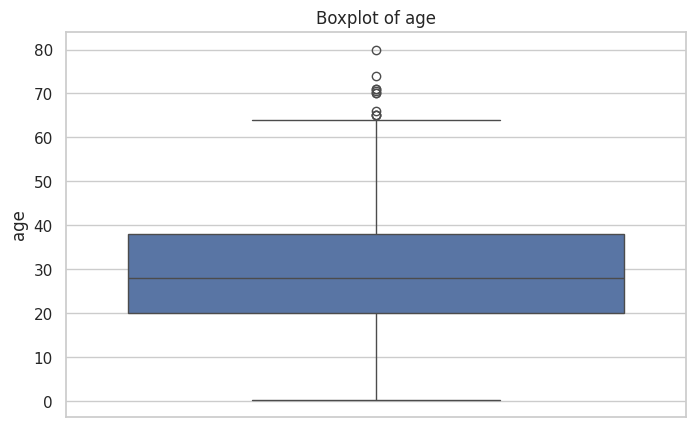

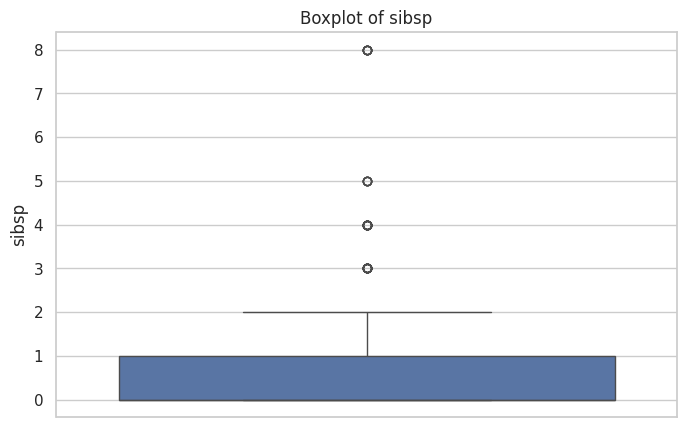

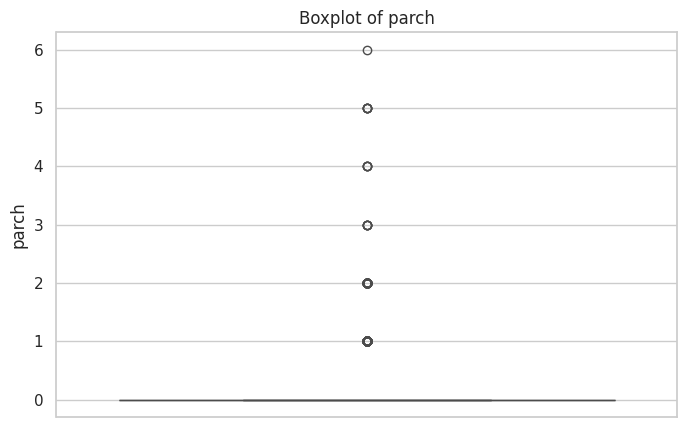

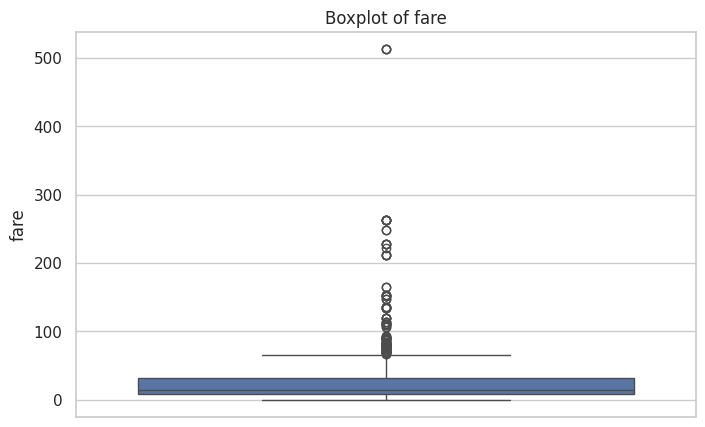

In [23]:
print("\n Outlier Detection using Boxplots: ")
for col in numeric_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Removing Outliers :

In [24]:
print("\n Removing Outliers: ")
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

print("Original Data Shape:", df.shape)
print("Data Shape after removing outliers:", df_no_outliers.shape)


 Removing Outliers: 
Original Data Shape: (891, 15)
Data Shape after removing outliers: (598, 15)


In [25]:
from sklearn.preprocessing import LabelEncoder

print("\nEncoding categorical columns: ")

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object','category', 'bool']).columns.tolist()

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Categorical columns encoded: ")
print(df_encoded.head())



Encoding categorical columns: 
Categorical columns encoded: 
   survived  pclass   age  sibsp  parch     fare  sex_male  embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   embarked_S  class_Second  ...  deck_B  deck_C  deck_D  deck_E  deck_F  \
0        True         False  ...   False   False   False   False   False   
1       False         False  ...   False    True   False   False   False   
2        True         False  ...   False   False   False   False   False   
3        True         False  ...   False    True   False   False   False   
4        True         False  ...   False   False   False   False   False   

   deck_G  embark_town_Queenstown  e

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

print("\nApplying StandardScaler :")

scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("Scaled Data: ")
print(df_encoded.head())

scaler = MinMaxScaler()

# Apply MinMax to the numerical columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("Scaled Data: ")
print(df_encoded.head())



Applying StandardScaler :
Scaled Data: 
   survived    pclass       age     sibsp     parch      fare  sex_male  \
0         0  0.827377 -0.530377  0.432793 -0.473674 -0.502445      True   
1         1 -1.566107  0.571831  0.432793 -0.473674  0.786845     False   
2         1  0.827377 -0.254825 -0.474545 -0.473674 -0.488854     False   
3         1 -1.566107  0.365167  0.432793 -0.473674  0.420730     False   
4         0  0.827377  0.365167 -0.474545 -0.473674 -0.486337      True   

   embarked_Q  embarked_S  class_Second  ...  deck_B  deck_C  deck_D  deck_E  \
0       False        True         False  ...   False   False   False   False   
1       False       False         False  ...   False    True   False   False   
2       False        True         False  ...   False   False   False   False   
3       False        True         False  ...   False    True   False   False   
4       False        True         False  ...   False   False   False   False   

   deck_F  deck_G  embark_t